In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
data=pd.read_csv(r'C:\Users\amos\Desktop\year2sem2\DataScience\Admission_Predict.csv')


In [6]:
data.tail()


,Serial No.,Test score,TOEFL Score,University Rating,SOP,CGPAvarage,Research,Chance of Admit
395,396,324,110,3,3.5,9.04,1,0.82
396,397,325,107,3,3.0,9.11,1,0.84
397,398,330,116,4,5.0,9.45,1,0.91
398,399,312,103,3,3.5,8.78,0,0.67
399,400,333,117,4,5.0,9.66,1,0.95


In [8]:
data.isnull().sum()

Serial No.           0
Test score           0
TOEFL Score          0
University Rating    0
SOP                  0
CGPAvarage           0
Research             0
Chance of Admit      0
dtype: int64

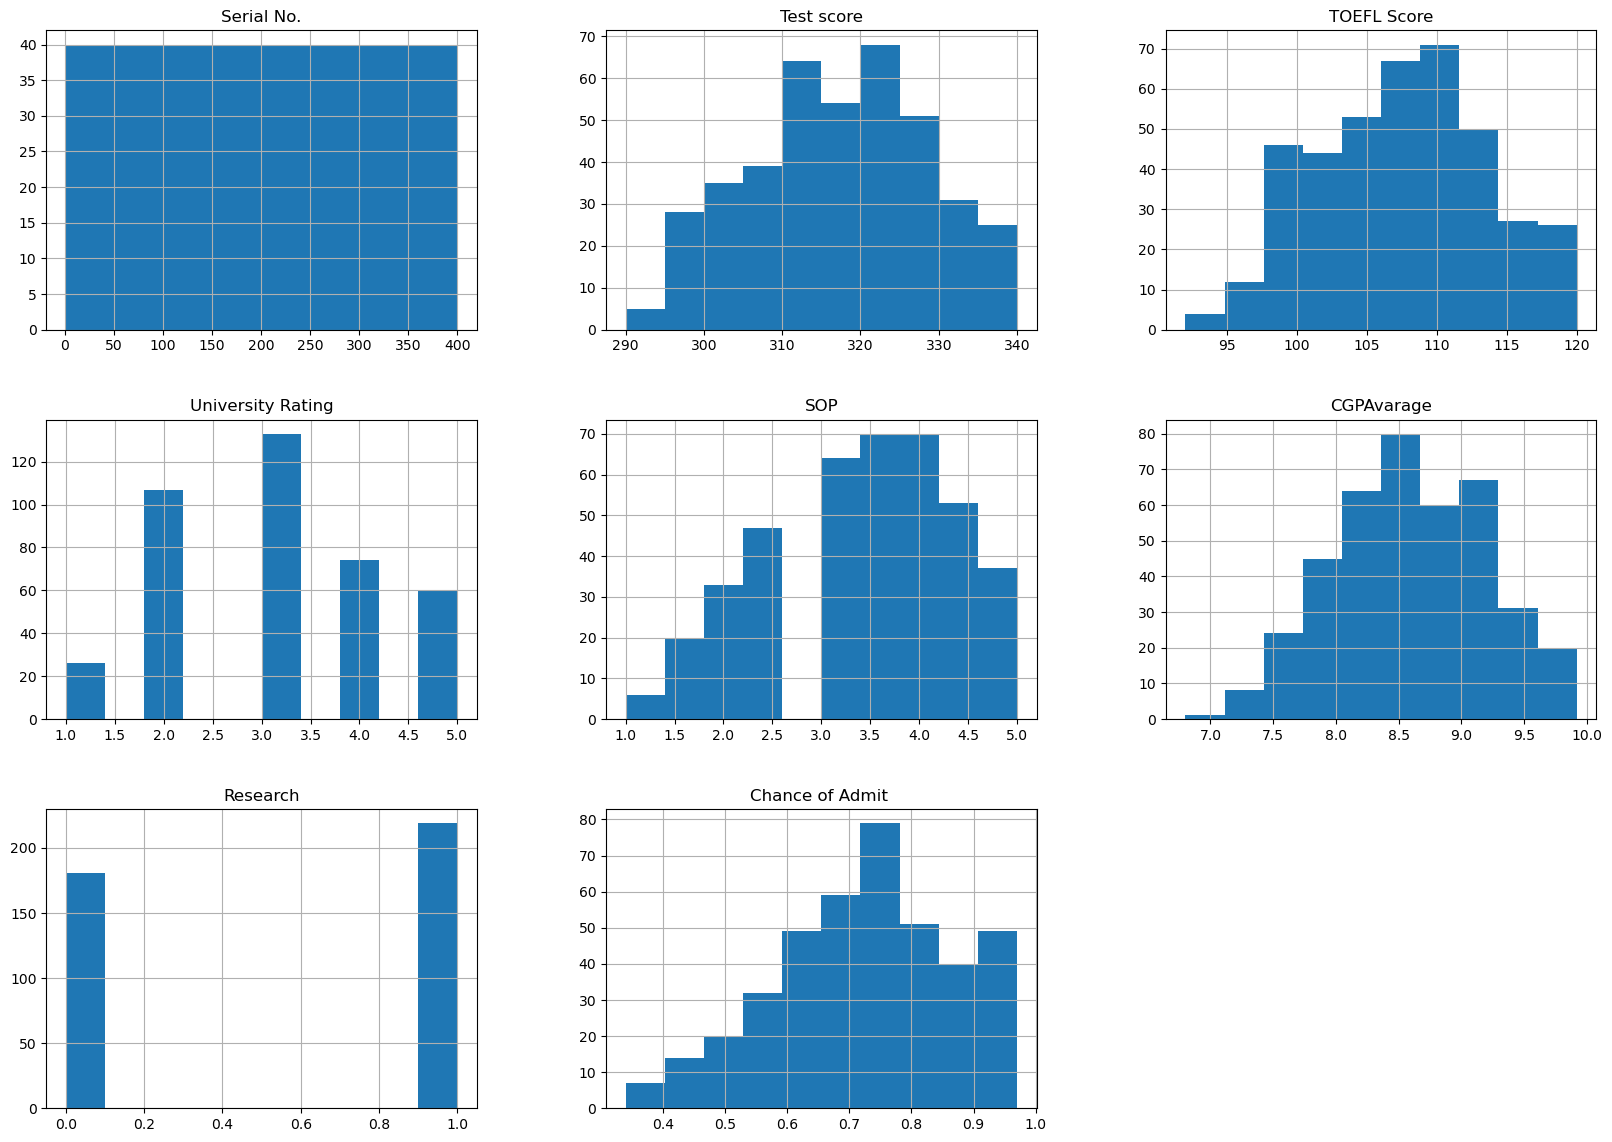

In [10]:
data.hist(figsize=(20,14))
plt.show()

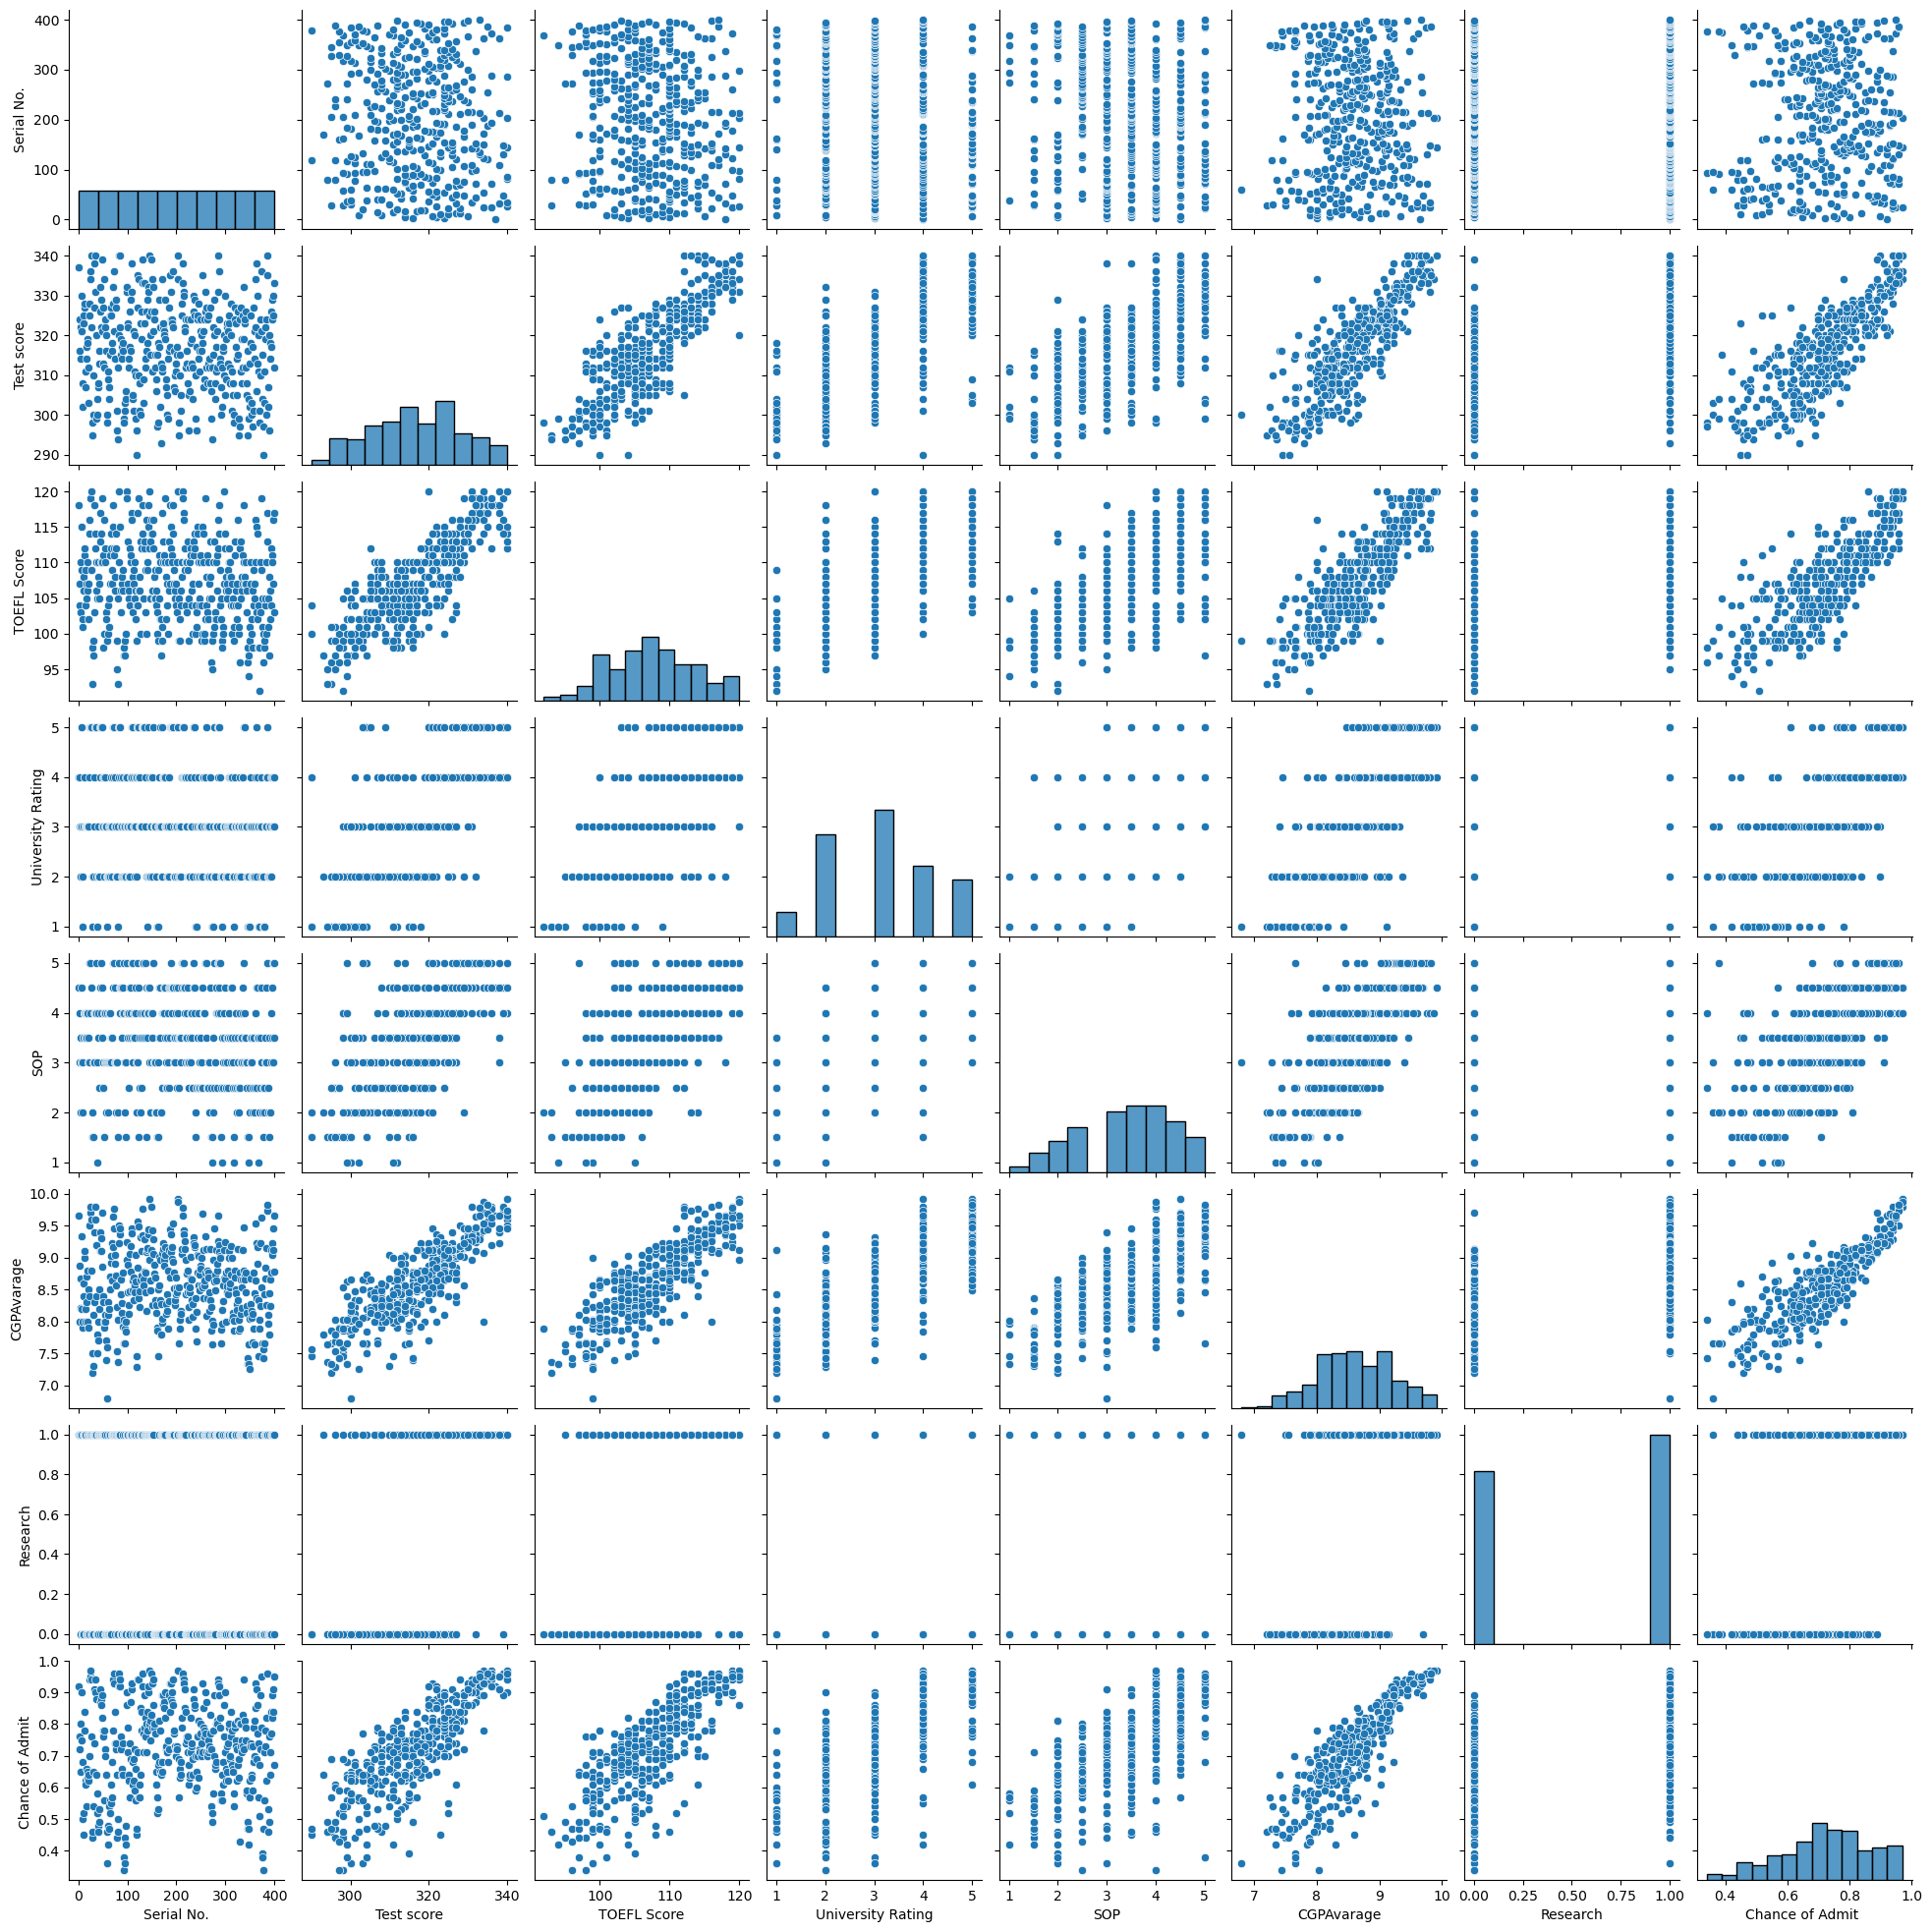

In [11]:
sns.pairplot(data=data)

In [16]:
data.corr()

,Serial No.,Test score,TOEFL Score,University Rating,SOP,CGPAvarage,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.045608,-0.063138,0.042336
Test score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.718144,0.444029,0.675732
CGPAvarage,-0.045608,0.833060,0.828417,0.746479,0.718144,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.873289,0.553202,1.000000


<Axes: >

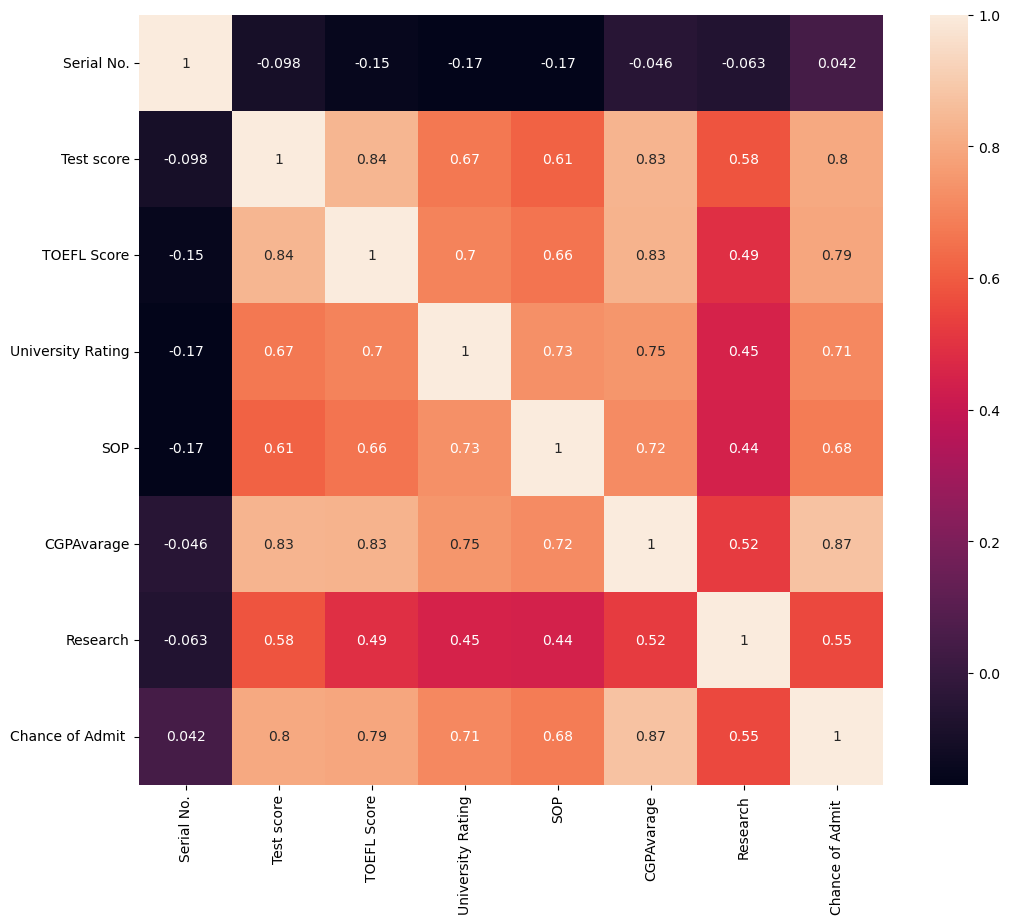

In [18]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), annot =True)

<Axes: xlabel='University Rating', ylabel='Test score'>

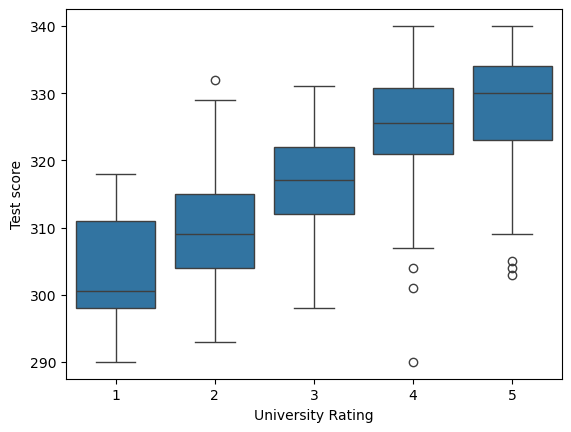

In [22]:
sns.boxplot(x="University Rating",y="Test score",data=data)

<Axes: xlabel='University Rating', ylabel='CGPAvarage'>

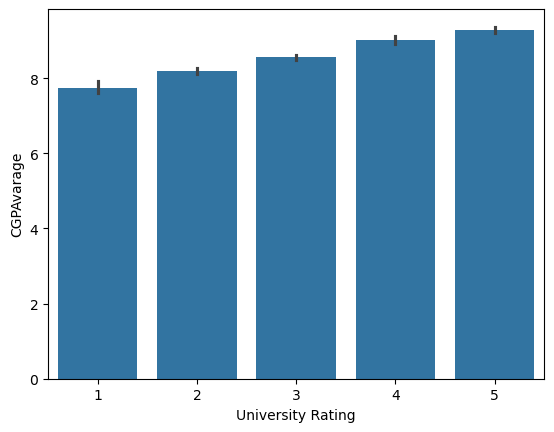

In [26]:
sns.barplot(x="University Rating",y="CGPAvarage",data=data)

<Axes: xlabel='CGPAvarage', ylabel='Test score'>

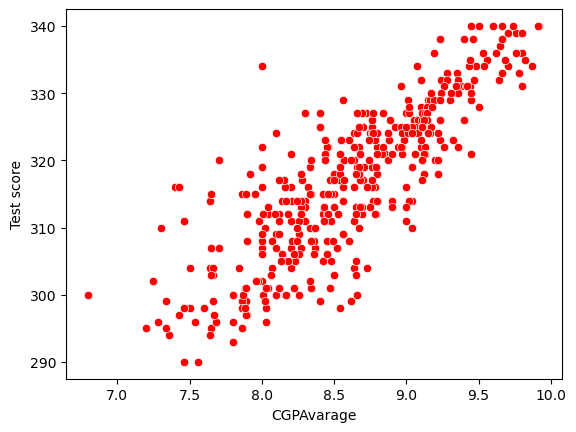

In [30]:
sns.scatterplot(x="CGPAvarage",y="Test score",data=data,color='r')

In [ ]:
#Training the data set

In [32]:
x = data.drop('Chance of Admit ',axis=1)
y = data['Chance of Admit ']


In [42]:
from sklearn.linear_model import LassoLars,LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import train_test_split

In [44]:
# Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                     test_size = 0.3, random_state = 30)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

280
120
280
120


In [ ]:
#linear reggression model

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [72]:
# Normalize x_train and x_test if needed
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [74]:
# Fit the model
lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train)

LinearRegression()

In [76]:
# Display intercept and coefficients
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

Intercept: 0.7304285714285714
Coefficients: [0.01563592 0.02362805 0.01305066 0.01141723 0.01367287 0.0646813
 0.01530166]


In [78]:
# Predict on test set
y_pred = lin_reg.predict(x_test_scaled)

In [80]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = lin_reg.score(x_test_scaled, y_test) * 100

In [82]:
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Model Accuracy: {score}%")

Mean Squared Error: 0.0044595863714137155
Mean Absolute Error: 0.04747279734785281
Model Accuracy: 80.52721731815727%


In [ ]:
#Ridge regression model

In [84]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Normalize the data if needed
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize Ridge regression model with a regularization parameter alpha
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train_scaled, y_train)

# Get model parameters
print("Intercept:", ridge_reg.intercept_)
print("Coefficients:", ridge_reg.coef_)

# Predict and evaluate
y_pred = ridge_reg.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = ridge_reg.score(x_test_scaled, y_test) * 100

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Model Accuracy: {score}%")


Intercept: 0.7304285714285714
Coefficients: [0.01565972 0.02377272 0.01335149 0.01159838 0.01380083 0.06385412
 0.01531443]
Mean Squared Error: 0.004466239127357142
Mean Absolute Error: 0.0475203264513224
Model Accuracy: 80.49816806113377%


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv(r'C:\Users\amos\Desktop\year2sem2\DataScience\Admission_Predict.csv')

# Create a binary target variable
data['Admit'] = (data['Chance of Admit '] >= 0.75).astype(int)  # 1 if high chance, 0 otherwise

# Define features (drop the original Chance of Admit and binary 'Admit' is now our target)
X = data.drop(['Chance of Admit ', 'Admit'], axis=1)
y = data['Admit']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train_scaled, y_train)


LogisticRegression()

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.84
Precision: 0.81
Recall: 0.82
F1 Score: 0.82
ROC-AUC Score: 0.95
Confusion Matrix:
[[59 10]
 [ 9 42]]


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(random_state=30)

# Train the model
rf_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test_scaled)
y_proba_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC-AUC for comparison
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.2f}")


Random Forest ROC-AUC Score: 0.93


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(random_state=30)

# Train the model
rf_clf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test_scaled)
y_proba_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC-AUC for comparison
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.2f}")


Random Forest ROC-AUC Score: 0.93
